# Overfitting demo - Ridge, Lasso

## Create a dataset based on a true sinusoidal relationship
Let's look at a synthetic dataset consisting of 30 points drawn from the sinusoid $y = \sin(4x)$:

In [191]:
import math
import random
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import KFold
from matplotlib import pyplot as plt
%matplotlib inline

Create random values for x in interval [0,1]

In [2]:
random.seed(98103)
n = 30

x = [random.random() for i in range(n)]
x.sort()
print x

[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]


Compute y

In [3]:
def sin_of_4_times(x):
    return math.sin(4*x)

sin_of_4_times = np.vectorize(sin_of_4_times) 

y = sin_of_4_times(x)

Add random Gaussian noise to y

In [4]:
random.seed(1)

e = [random.gauss(0,1.0/3.0) for i in range(n)]

#e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

### Put data into an Data Frame to manipulate later

In [5]:
data = pd.DataFrame({'X1':x,'Y':y})

### Create a function to plot the data, since we'll do it many times

In [6]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

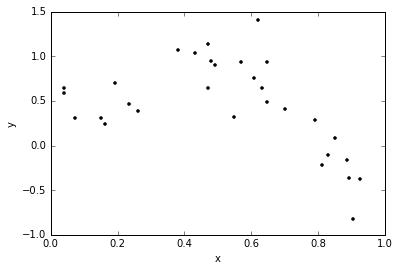

In [7]:
plot_data(data)

## Define some useful polynomial regression functions

Define a function to create our features for a polynomial regression model of any degree:

In [8]:
def polynomial_features(data, deg):
    
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    
    return data_copy

Define a function to fit a polynomial linear regression model of degree "deg" to the data in "data":

In [9]:
data1 = polynomial_features(data, deg=2)
print data1.head()

         X1         Y        X2
0  0.039579  0.587050  0.001566
1  0.041568  0.648656  0.001728
2  0.072432  0.307803  0.005246
3  0.150289  0.310748  0.022587
4  0.161334  0.237410  0.026029


In [10]:
def polynomial_regression(data, deg):
    feature_cols = []
    for i in xrange(deg):
        feature_cols.append('X' + str(i+1))
    print feature_cols
    
    
    polynomial_data = polynomial_features(data, deg)
    
    X = polynomial_data[feature_cols]
    y = polynomial_data.Y
   
    print X.head()
    
    model = LinearRegression()
    model.fit(X, y)
    
    return model

Define function to plot data and predictions made, since we are going to use it many times.

In [11]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coef_)
    
    # Create 200 points in the x axis and compute the predicted value for each point
    df = pd.DataFrame({'X1':[i/200.0 for i in range(200)]})
    
    X = polynomial_features(df, deg)  
    y = model.predict(X)
    
    # plot predictions
    plt.plot(df, y, 'g-', label='degree ' + str(deg) + ' fit')
    
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

Create a function that prints the polynomial coefficients in a pretty way :)

In [217]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coef_)

    # Get learned parameters as a list
    w = [model.intercept_] + model.coef_.tolist()
    
    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    
    w.reverse()
    
    print np.poly1d(w)

## Fit a degree-2 polynomial

Fit our degree-2 polynomial to the data generated above:

In [13]:
model = polynomial_regression(data, deg=2)

['X1', 'X2']
         X1        X2
0  0.039579  0.001566
1  0.041568  0.001728
2  0.072432  0.005246
3  0.150289  0.022587
4  0.161334  0.026029


Inspect learned parameters

In [16]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


Form and plot our predictions along a grid of x values:

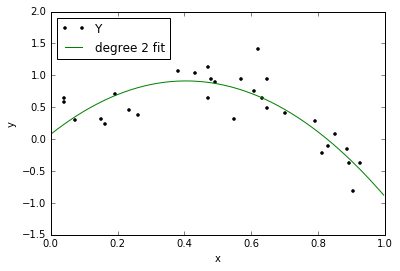

In [17]:
plot_poly_predictions(data, model)

## Fit a degree-4 polynomial

['X1', 'X2', 'X3', 'X4']
         X1        X2        X3        X4
0  0.039579  0.001566  0.000062  0.000002
1  0.041568  0.001728  0.000072  0.000003
2  0.072432  0.005246  0.000380  0.000028
3  0.150289  0.022587  0.003395  0.000510
4  0.161334  0.026029  0.004199  0.000677
Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


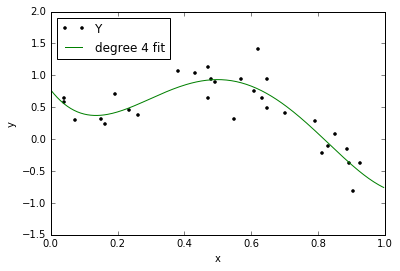

In [18]:
model = polynomial_regression(data, deg=4)
print_coefficients(model)
plot_poly_predictions(data,model)

## Fit a degree-16 polynomial

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']
         X1        X2        X3        X4            X5            X6  \
0  0.039579  0.001566  0.000062  0.000002  9.712277e-08  3.844017e-09   
1  0.041568  0.001728  0.000072  0.000003  1.241083e-07  5.158947e-09   
2  0.072432  0.005246  0.000380  0.000028  1.993659e-06  1.444046e-07   
3  0.150289  0.022587  0.003395  0.000510  7.667197e-05  1.152296e-05   
4  0.161334  0.026029  0.004199  0.000677  1.093028e-04  1.763428e-05   

             X7            X8            X9           X10           X11  \
0  1.521421e-10  6.021625e-12  2.383296e-13  9.432833e-15  3.733416e-16   
1  2.144476e-10  8.914179e-12  3.705455e-13  1.540287e-14  6.402681e-16   
2  1.045951e-08  7.576024e-10  5.487462e-11  3.974675e-12  2.878935e-13   
3  1.731774e-06  2.602667e-07  3.911523e-08  5.878591e-09  8.834878e-10   
4  2.845012e-06  4.589975e-07  7.405197e-08  1.194711e-08  1.927477e-09   

      

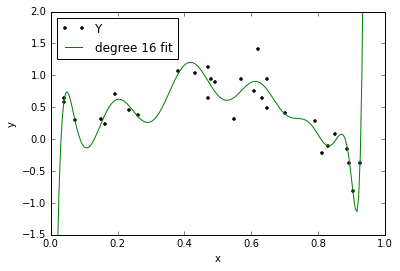

In [19]:
model = polynomial_regression(data, deg=16)
print_coefficients(model)
plot_poly_predictions(data,model)

Note: Fit looks pretty wild. Here's a clear example of how overfitting is associated with very large magnitude estimated coefficients.

# Ridge Regression

Ridge regression aims to avoid overfitting by adding a cost to the RSS term of standard least squares that depends on the 2-norm of the coefficients $\|w\|$.  The result is penalizing fits with large coefficients.  The strength of this penalty, and thus the fit vs. model complexity balance, is controled by a parameter lambda (here called "L2_penalty").

Function to solve the ridge objective for a polynomial regression model of any degree:

In [20]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    feature_cols = []
    for i in xrange(deg):
        feature_cols.append('X' + str(i+1))
        
    poly_data = polynomial_features(data,deg)
    X = poly_data[feature_cols]
    y = poly_data.Y
    
    model = Ridge(alpha = l2_penalty)
    model.fit(X, y) 
    return model

## Perform a ridge fit of a degree-16 polynomial using a very small penalty strength

In [21]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Learned polynomial for degree 16:
           16             15             14             13
3.214e+08 x  - 2.129e+09 x  + 6.276e+09 x  - 1.082e+10 x 
              12             11             10             9
 + 1.202e+10 x  - 8.893e+09 x  + 4.301e+09 x  - 1.184e+09 x
              8             7             6             5             4
 + 2.616e+07 x + 1.298e+08 x - 6.199e+07 x + 1.641e+07 x - 2.842e+06 x
              3             2
 + 3.255e+05 x - 2.308e+04 x + 873.4 x - 12.41


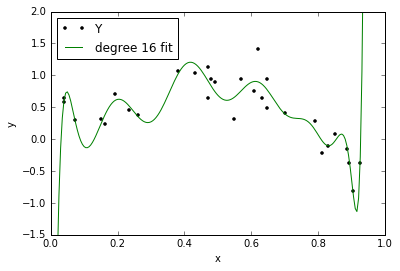

In [22]:
plot_poly_predictions(data,model)

## Perform a ridge fit of a degree-16 polynomial using a very large penalty strength

In [23]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=100)
print_coefficients(model)

Learned polynomial for degree 16:
           16           15            14            13           12
-0.007084 x  - 0.00789 x  - 0.008794 x  - 0.009809 x  - 0.01095 x 
            11           10           9           8           7
 - 0.01222 x  - 0.01364 x  - 0.01521 x - 0.01694 x - 0.01879 x
           6           5           4           3           2
 - 0.0207 x - 0.02253 x - 0.02397 x - 0.02439 x - 0.02253 x - 0.01594 x + 0.4948


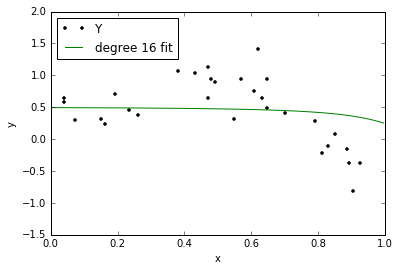

In [24]:
plot_poly_predictions(data,model)

## Let's look at fits for a sequence of increasing lambda values

lambda = 1.00e-25
Learned polynomial for degree 16:
           16             15             14             13
3.214e+08 x  - 2.129e+09 x  + 6.276e+09 x  - 1.082e+10 x 
              12             11             10             9
 + 1.202e+10 x  - 8.893e+09 x  + 4.301e+09 x  - 1.184e+09 x
              8             7             6             5             4
 + 2.616e+07 x + 1.298e+08 x - 6.199e+07 x + 1.641e+07 x - 2.842e+06 x
              3             2
 + 3.255e+05 x - 2.308e+04 x + 873.4 x - 12.41


lambda = 1.00e-10
Learned polynomial for degree 16:
      16        15        14         13        12        11         10
7567 x  - 7803 x  - 6900 x  + 714.5 x  + 6541 x  + 5802 x  - 498.1 x 
         9        8        7        6        5         4         3
 - 6056 x - 4252 x + 3439 x + 4893 x - 4281 x + 769.9 x + 100.6 x
          2
 - 11.39 x - 4.716 x + 0.7859


lambda = 1.00e-06
Learned polynomial for degree 16:
        16         15         14         13         12         11


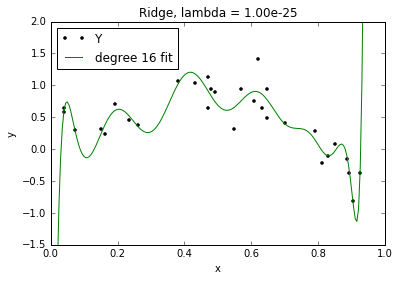

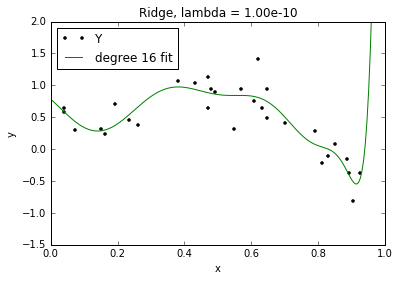

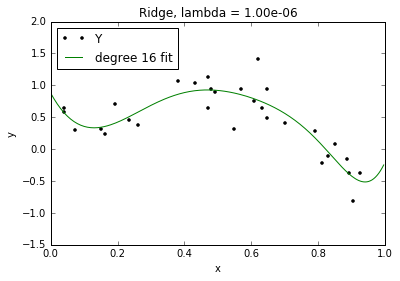

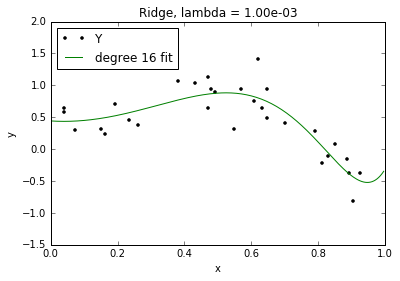

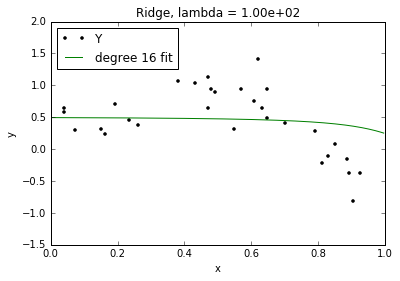

In [25]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

## Perform a ridge fit of a degree-16 polynomial using a "good" penalty strengthÂ¶

Cross Validation is a way to select a good value of the tuning parameter (penalty strength) lambda.  

Here, lets use "leave one out" (LOO) cross validation, which one can show approximates average mean square error (MSE).  As a result, choosing lambda to minimize the LOO error is equivalent to choosing lambda to minimize an approximation to average MSE.

In [186]:
def loo(data, deg, l2_penalty_values):
    mse_all = []
    for l2_penalty in l2_penalty_values:
        
        poly_data = polynomial_features(data, deg)
        
        # Create as many folds for cross validatation as number of data points
        num = len(poly_data)
        folds = KFold(num, n_folds=num, shuffle=False, random_state=None)
    
        feature_cols = []
        for i in xrange(deg):
            feature_cols.append('X' + str(i+1))
        mse = []
        for train_index, valid_index in folds:
            poly_data_train = poly_data.ix[train_index]
            poly_data_valid = poly_data.ix[valid_index]
            X = poly_data_valid[feature_cols]
        
            model = polynomial_ridge_regression(poly_data_train, deg=16, l2_penalty=l2_penalty)
        
            prediction = model.predict(X)
        
            error = prediction - poly_data_valid.ix[valid_index]['Y']
            error_squared = math.pow(error,2)
        
            mse.append(error_squared)
        
        min_mse = min(mse)
        mse_all.append(min_mse)
       
    min_mse_all = min(mse_all)
    best_l2_penalty_index = 111111
    for i in xrange(len(mse_all)):
        if(mse_all[i] == min_mse_all):
            best_l2_penalty_index = i
    
    i = 1
    best_l2_penalty = 0
    for l2_penalty in l2_penalty_values:
        if i == best_l2_penalty_index:
            best_l2_penalty = l2_penalty
        i = i + 1
    return mse_all, best_l2_penalty

In [187]:
l2_penalty_values = np.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)
print l2_penalty_mse, best_l2_penalty

[7.035158003710213e-05, 0.0007696884629148222, 2.510874782810957e-05, 2.101206689277181e-05, 0.0002152899458418672, 7.422249235697326e-05, 8.679288651876994e-05, 8.715754732389478e-05, 8.716770580103836e-05, 8.716798847566284e-05] 0.129154966501


Plot results of estimating LOO for each value of lambda

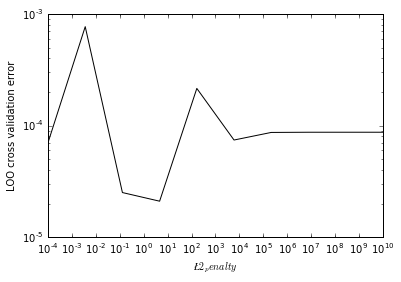

In [188]:
plt.plot(l2_penalty_values,l2_penalty_mse,'k-')
plt.xlabel('$\L2_penalty$')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

In [189]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

Learned polynomial for degree 16:
         16           15           14           13           12
0.09862 x  + 0.08127 x  + 0.05755 x  + 0.02603 x  - 0.01492 x 
            11         10          9          8          7          6
 - 0.06704 x  - 0.132 x  - 0.2109 x - 0.3035 x - 0.4063 x - 0.5089 x
           5          4          3          2
 - 0.5866 x - 0.5862 x - 0.4055 x + 0.1019 x + 0.8478 x + 0.448


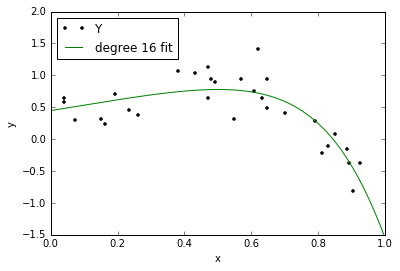

In [190]:
plot_poly_predictions(data,model)

# Lasso Regression

Lasso regression jointly shrinks coefficients to avoid overfitting, and implicitly performs feature selection by setting some coefficients exactly to 0 for sufficiently large penalty strength lambda (here called "L1_penalty").  In particular, lasso takes the RSS term of standard least squares and adds a 1-norm cost of the coefficients $\|w\|$.

Function to solve the lasso objective for a polynomial regression model of any degree:

In [192]:
def polynomial_lasso_regression(data, deg, l1_penalty):
    feature_cols = []
    for i in xrange(deg):
        feature_cols.append('X' + str(i+1))
    poly_data = polynomial_features(data,deg)
    
    X = poly_data[feature_cols]
    y = poly_data.Y    
    
    model = Lasso(alpha = l1_penalty, copy_X=True, fit_intercept=True, max_iter=1000,
                    normalize=False, positive=False, precompute=False, random_state=None,
                    selection='cyclic', tol=0.0001, warm_start=False)
    model.fit(X, y)
    return model

## Explore the lasso solution as a function of a few different penalty strengths

We refer to lambda in the lasso case below as "l1_penalty

l1_penalty = 1.000000e-04
number of nonzeros = 4
Learned polynomial for degree 16:
        16         15          14          13          12          11
0.1254 x  + 0.436 x  + 0.7122 x  + 0.3223 x  + 0.1945 x  + 0.2729 x 
           10     6         5         4         3        2
 + 0.1514 x  - 0 x - 1.128 x - 3.473 x - 2.418 x + 4.13 x - 0.02906 x + 0.4109


l1_penalty = 1.000000e-02
number of nonzeros = 14
Learned polynomial for degree 16:
       5     4     3
-1.96 x - 0 x - 0 x + 0.2618 x + 0.628


l1_penalty = 1.000000e-01
number of nonzeros = 16
Learned polynomial for degree 16:
 
0.4527


l1_penalty = 1.000000e+01
number of nonzeros = 16
Learned polynomial for degree 16:
 
0.4527




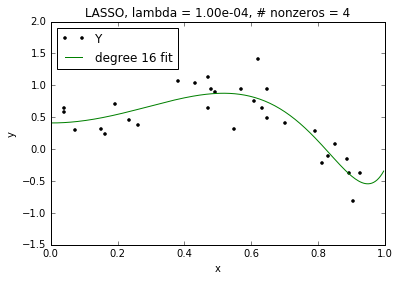

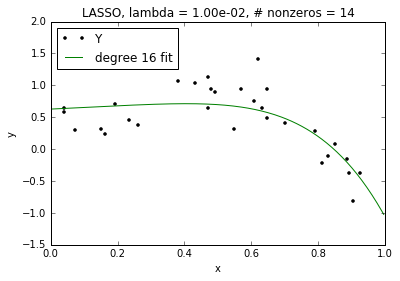

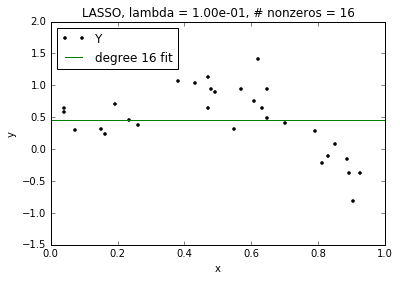

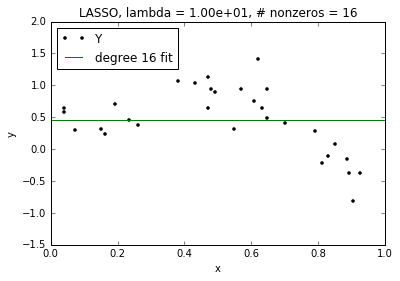

In [228]:
for l1_penalty in [0.0001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(data, deg=16, l1_penalty=l1_penalty)
    print 'l1_penalty = %e' % l1_penalty
     
    nonzero_count = 0
    for i in model.coef_:
        if i == 0:
            nonzero_count = nonzero_count + 1
        
    print 'number of nonzeros = %d' % nonzero_count
    
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % (l1_penalty, nonzero_count))

**Above:** We see that as lambda increases, we get sparser and sparser solutions. However, even for our non-sparse case for lambda=0.0001, the fit of our high-order polynomial is not too wild. This is because, like in ridge, coefficients included in the lasso solution are shrunk relative to those of the least squares (unregularized) solution. This leads to better behavior even without sparsity. Of course, as lambda goes to 0, the amount of this shrinkage decreases and the lasso solution approaches the (wild) least squares solution.